<a href="https://colab.research.google.com/github/farahulyrsd/AnalitikaData/blob/main/3333210052_Farah_Aliefia_Ulyrusda_Kelas_D_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

mengimpor library pandas, numpy, dan pyplot dari library matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

mengimpor file dataset dari google drive

In [ ]:
!gdown --id 1LDCYYV_yNCnof9Jk5JTxNVgMDIpq0Smr

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LDCYYV_yNCnof9Jk5JTxNVgMDIpq0Smr
To: /content/Housing.csv
100% 35.4k/35.4k [00:00<00:00, 63.6MB/s]


mengimpor library pandas, membaca file CSV 'Housing.csv', dan menyimpannya dalam variabel dataset. Kemudian, menampilkan konten dari variabel dataset yang berisi data dari file CSV tersebut.

In [ ]:
import pandas as pd
dataset = pd.read_csv('Housing.csv')
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


## 2. Exploratory Data

mengetahui berapa banyak baris dan kolom yang terdapat dalam dataset

In [ ]:
dataset.shape

(509, 14)

memeriksa nama-nama kolom dalam dataset, sehingga memudahkan dalam melakukan operasi pada kolom-kolom tersebut.

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

memeriksa tipe data yang ada pada dataset, tipe data object (teks), int64 (bilangan bulat), dan  float64 (pecahan).

In [ ]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

dapat memperoleh informasi ringkas mengenai struktur data, termasuk tipe data dan jumlah nilai non-null. Informasi ini berguna dalam proses eksplorasi dan pemahaman data sebelum melakukan analisis lebih lanjut.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


mengetahui jumlah nilai unik yang ada dalam setiap kolom. Informasi ini berguna untuk menganalisis variasi atau keberagaman data dalam kolom-kolom dataset tersebut.

In [ ]:
dataset.nunique()

CRIM       503
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        354
DIS        411
RAD          9
TAX         66
PTRATIO     46
B          356
LSTAT      453
MEDV       228
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

mengidentifikasi nilai-nilai null atau missing

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

mengetahui tipe data dari kolom 'INDUS'. Informasi ini penting dalam pemahaman struktur data dan pemrosesan data yang melibatkan kolom tersebut.

In [ ]:
dataset['INDUS'].dtypes

dtype('float64')

mengetahui tipe data dari kolom 'NOX'. Informasi ini penting dalam pemahaman struktur data dan pemrosesan data yang melibatkan kolom tersebut.

In [ ]:
dataset['NOX'].dtypes

dtype('float64')

mengetahui tipe data dari kolom 'RAD'. Informasi ini penting dalam pemahaman struktur data dan pemrosesan data yang melibatkan kolom tersebut.

In [ ]:
dataset['RAD'].dtypes

dtype('float64')

mengetahui tipe data dari kolom 'AGE'. Informasi ini penting dalam pemahaman struktur data dan pemrosesan data yang melibatkan kolom tersebut.


In [ ]:
dataset['AGE'].dtypes

dtype('float64')

mengetahui tipe data dari kolom 'LSAT'. Informasi ini penting dalam pemahaman struktur data dan pemrosesan data yang melibatkan kolom tersebut.

In [ ]:
dataset['LSTAT'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

lakukan imputer untuk menangani nilai yang hilang dalam data numerik

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

menunjukkan data pada kolom mana saja yang harus ditambahkan nilai karena sebelumnya tidak ada nilainya

In [ ]:
imputer = imputer.fit(dataset[['INDUS', 'NOX', 'AGE', 'RAD', 'LSTAT']])
imputer

SimpleImputer()

 melihat jumlah nilai-nilai dataset yang masih hilang

In [ ]:
dataset[['INDUS', 'NOX', 'AGE', 'RAD', 'LSTAT']] = imputer.transform(dataset[['INDUS', 'NOX', 'AGE', 'RAD', 'LSTAT']])
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Using drop column tohandle missing value on categorical or object data

menghapus kolom-kolom yang memiliki nilai null dalam dataset. Kemudian, memeriksa jumlah nilai null yang tersisa setelah penghapusan kolom.

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

menyajikan statistik deskriptif untuk setiap kolom dalam dataset

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.836437,0.253298,0.115405,0.703449,28.087058,2.101852,8.726467,168.814161,2.161553,91.562469,7.124956,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.100000,2.100700,4.000000,279.000000,17.400000,375.330000,7.120000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.000000,3.182700,5.000000,330.000000,19.100000,391.450000,11.450000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


coding tersebut menggambarkan hasil dari nilai standar deviasi, rata-rata, nilai median, nilai paling minimum, nilai paling minimal, serta menggambarkan Q1 dan Q2

metode ini digunakan untuk membuat plot visual dari data dalam dataset. Secara default, plot() akan membuat plot garis (line plot) untuk setiap kolom numerik dalam DataFrame.

<Axes: >

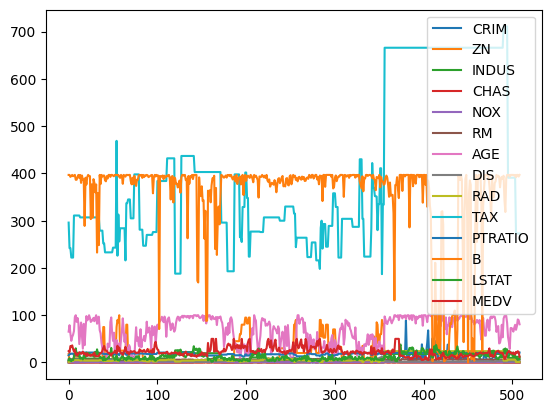

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

membuat plot kotak yang memvisualisasikan sebaran dan distribusi data numerik dalam dataset. Plot kotak memberikan informasi tentang nilai-nilai kuartil, nilai ekstrem, dan kehadiran pencilan (outlier) dalam data. Pengaturan default yang diatur dengan sns.set() juga memastikan tampilan yang estetis dan mudah dibaca dalam plot yang dihasilkan.

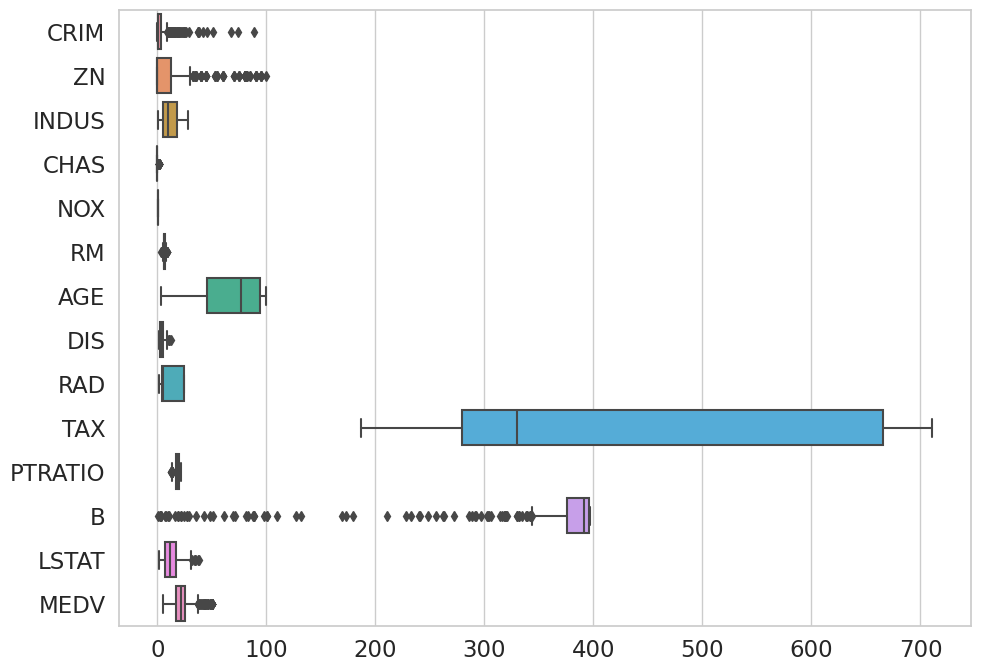

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

membuat scatter plot untuk memvisualisasikan hubungan antara dua variabel numerik dalam dataset. Pada contoh tersebut, variabel 'CRIM' diplot pada sumbu x dan variabel 'B' diplot pada sumbu y. Dengan memberikan label pada sumbu x dan sumbu y, Anda juga dapat memberikan informasi tentang variabel yang ditampilkan dalam scatter plot.

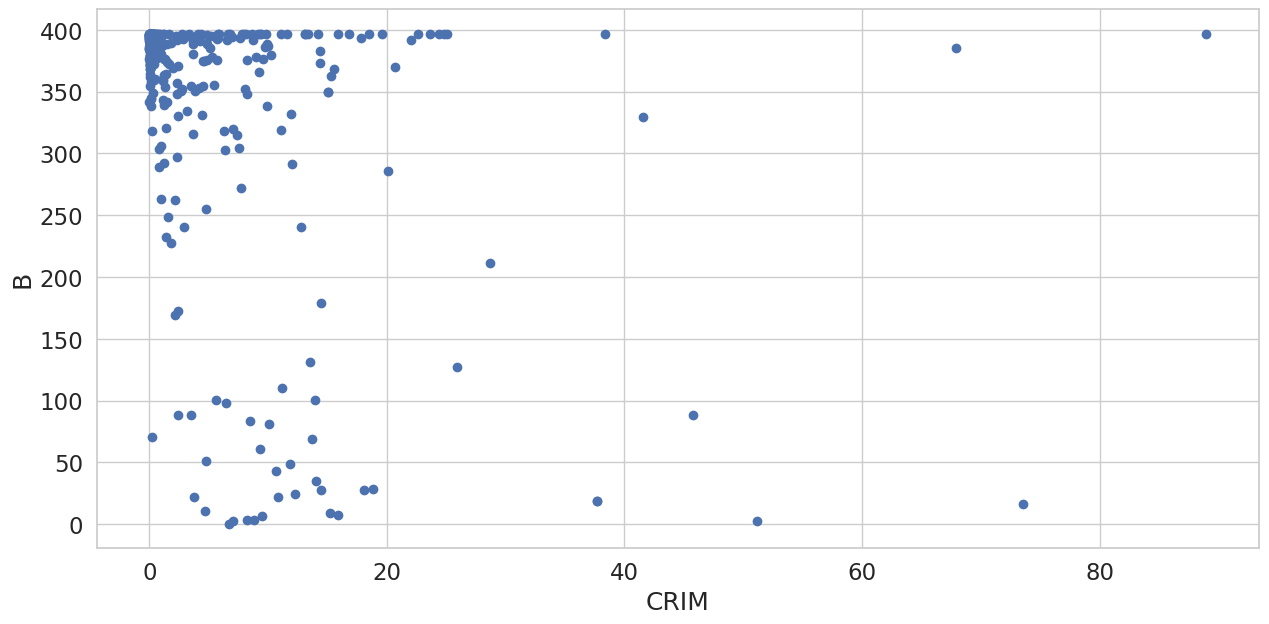

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['CRIM'], dataset['B'])
 
# x-axis label
ax.set_xlabel('CRIM')
 
# y-axis label
ax.set_ylabel('B')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

menghitung IQR dari kolom 'CRIM' dalam dataset menggunakan metode percentile() dari numpy. IQR digunakan untuk memahami sebaran data dalam suatu kolom dan dapat membantu dalam identifikasi pencilan (outlier) dalam data.

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['CRIM'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['CRIM'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (509, 14)


mengidentifikasi dan menghapus outlier dalam kolom 'CRIM' dalam dataset. Batas atas dan batas bawah dihitung menggunakan IQR, dan baris yang merupakan outlier dihapus dari Dataset. Hal ini membantu membersihkan dataset dari data yang ekstrem atau tidak biasa yang dapat mempengaruhi analisis atau pemodelan yang dilakukan.

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['CRIM'] > upper].index
outliers_lower = dataset[dataset['CRIM'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (440, 14)


menghitung IQR dari kolom 'B' dalam dataset menggunakan metode percentile() dari numpy. IQR digunakan untuk memahami sebaran data dalam suatu kolom dan dapat membantu dalam identifikasi pencilan (outlier) dalam data.

In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['B'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['B'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (440, 14)


mengidentifikasi dan menghapus outlier dalam kolom 'B' dalam dataset. Batas atas dan batas bawah dihitung menggunakan IQR, dan baris yang merupakan outlier dihapus dari Dataset. Hal ini membantu membersihkan dataset dari data yang ekstrem atau tidak biasa yang dapat mempengaruhi analisis atau pemodelan yang dilakukan.

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['B'] > upper].index
outliers_lower = dataset[dataset['B'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (389, 14)


membuat plot kotak yang memvisualisasikan sebaran dan distribusi data dalam dataset. Plot kotak memberikan informasi tentang nilai-nilai kuartil, nilai ekstrem, dan kehadiran pencilan (outlier) dalam data. Pengaturan default yang diatur dengan sns.set() juga memastikan tampilan yang estetis dan mudah dibaca dalam plot yang dihasilkan.






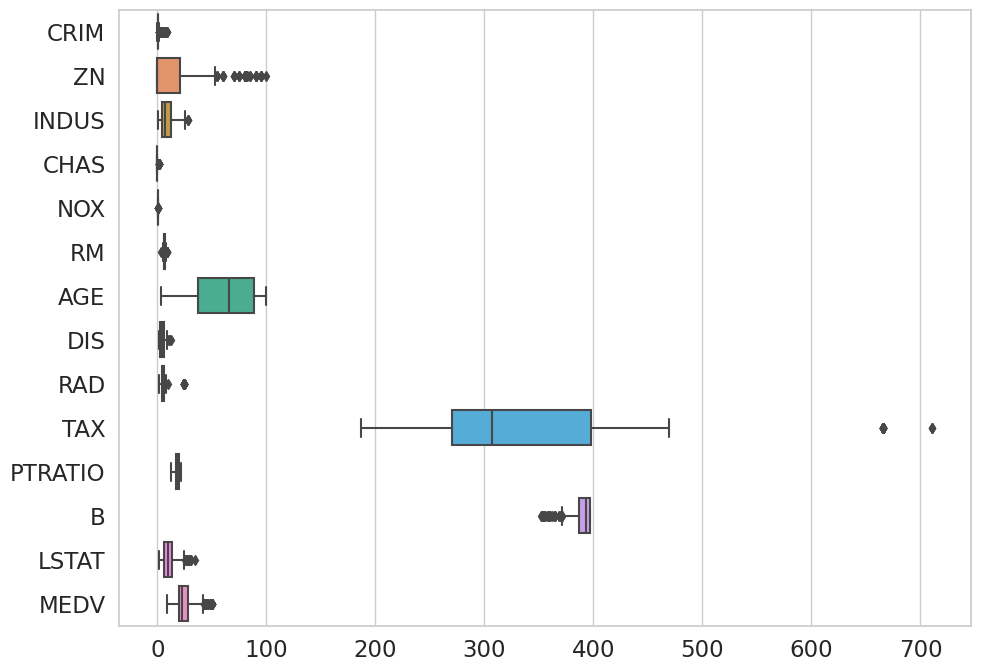

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

membuat scatter plot untuk memvisualisasikan hubungan antara dua variabel numerik dalam dataset. Pada contoh tersebut, variabel 'CRIM' diplot pada sumbu x dan variabel 'B' diplot pada sumbu y. Dengan memberikan label pada sumbu x dan sumbu y, Anda juga dapat memberikan informasi tentang variabel yang ditampilkan dalam scatter plot.

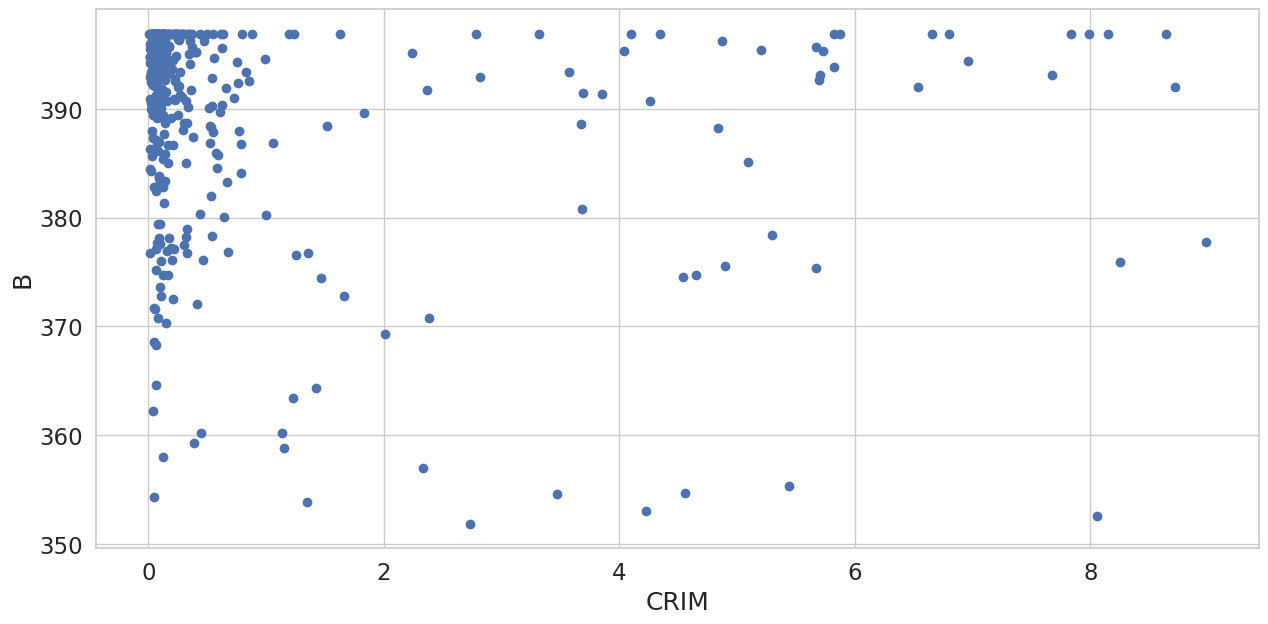

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['CRIM'], dataset['B'])
 
# x-axis label
ax.set_xlabel('CRIM')
 
# y-axis label
ax.set_ylabel('B')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

 membuat plot KDE untuk memvisualisasikan distribusi data dalam setiap kolom dataset. Dengan menggunakan tata letak subplot, Anda dapat menampilkan multiple plot dalam satu gambar untuk memudahkan perbandingan antar kolom.

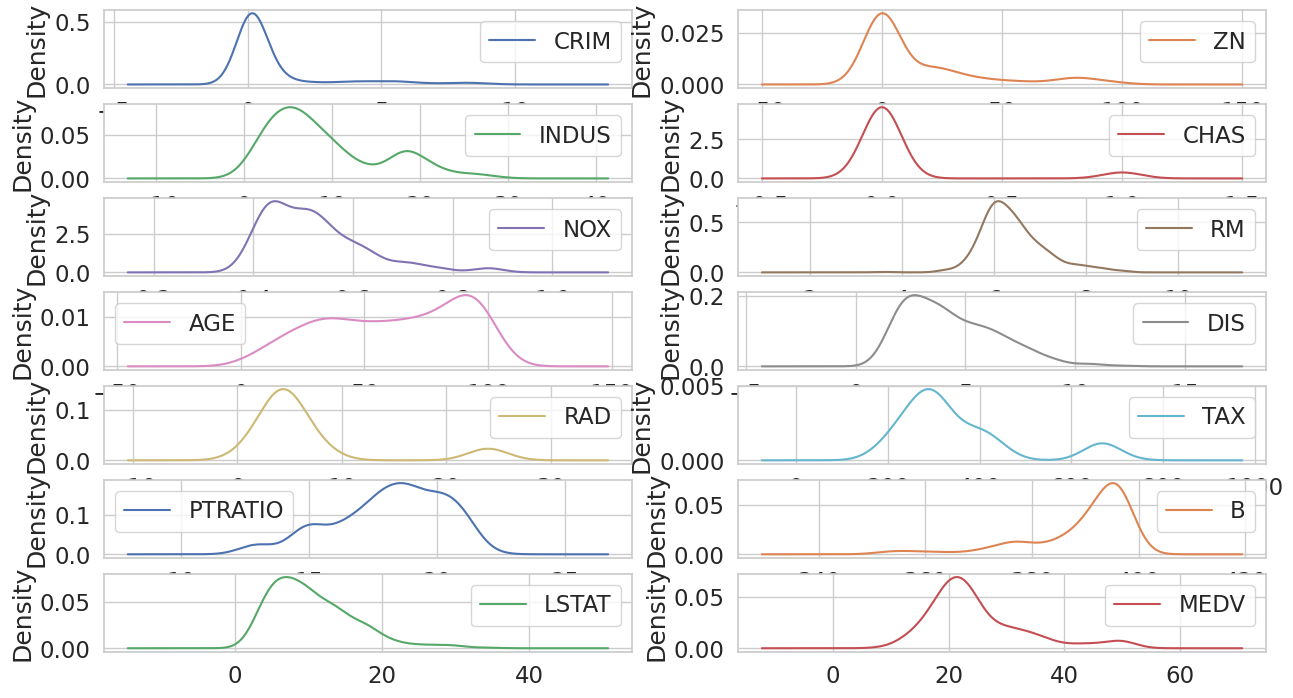

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

membuat plot histogram untuk memvisualisasikan distribusi data dalam setiap kolom dataset. Dengan menggunakan tata letak subplot, dapat menampilkan multiple plot dalam satu gambar untuk memudahkan perbandingan antar kolom.

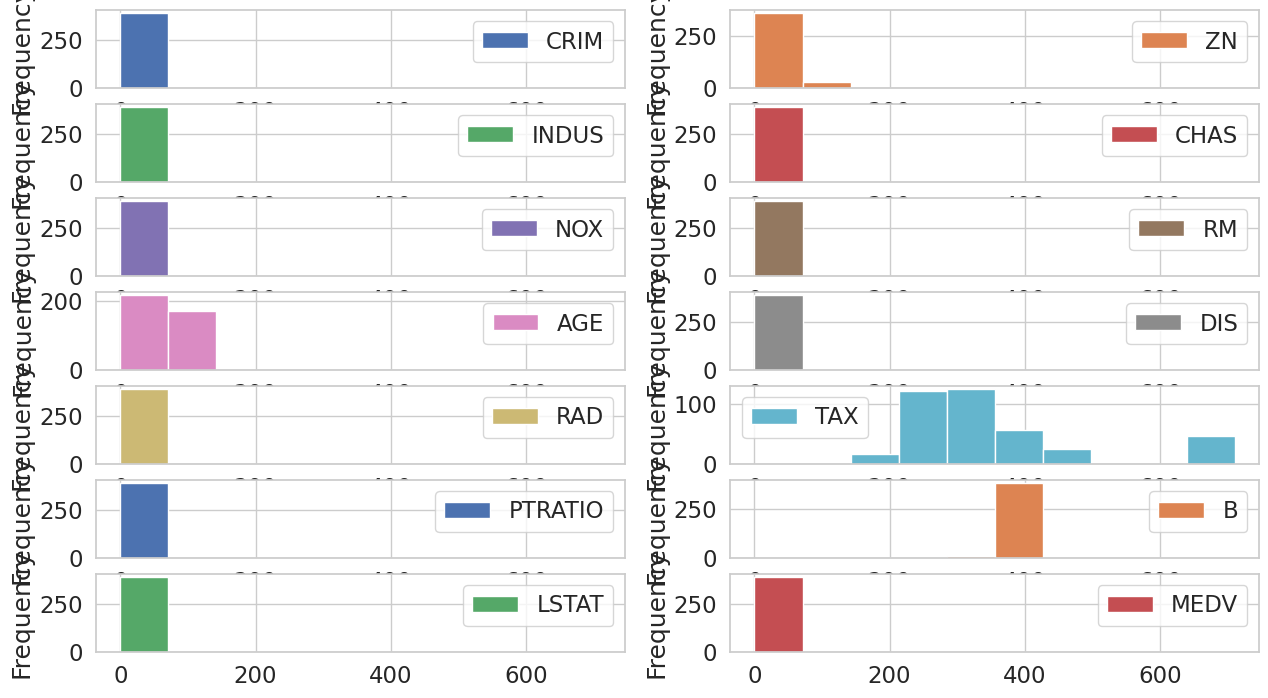

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

membuat plot garis untuk memvisualisasikan tren atau perubahan nilai dari setiap kolom dalam dataset. Dengan menggunakan tata letak subplot, dapat menampilkan multiple plot dalam satu gambar untuk memudahkan perbandingan antar kolom.

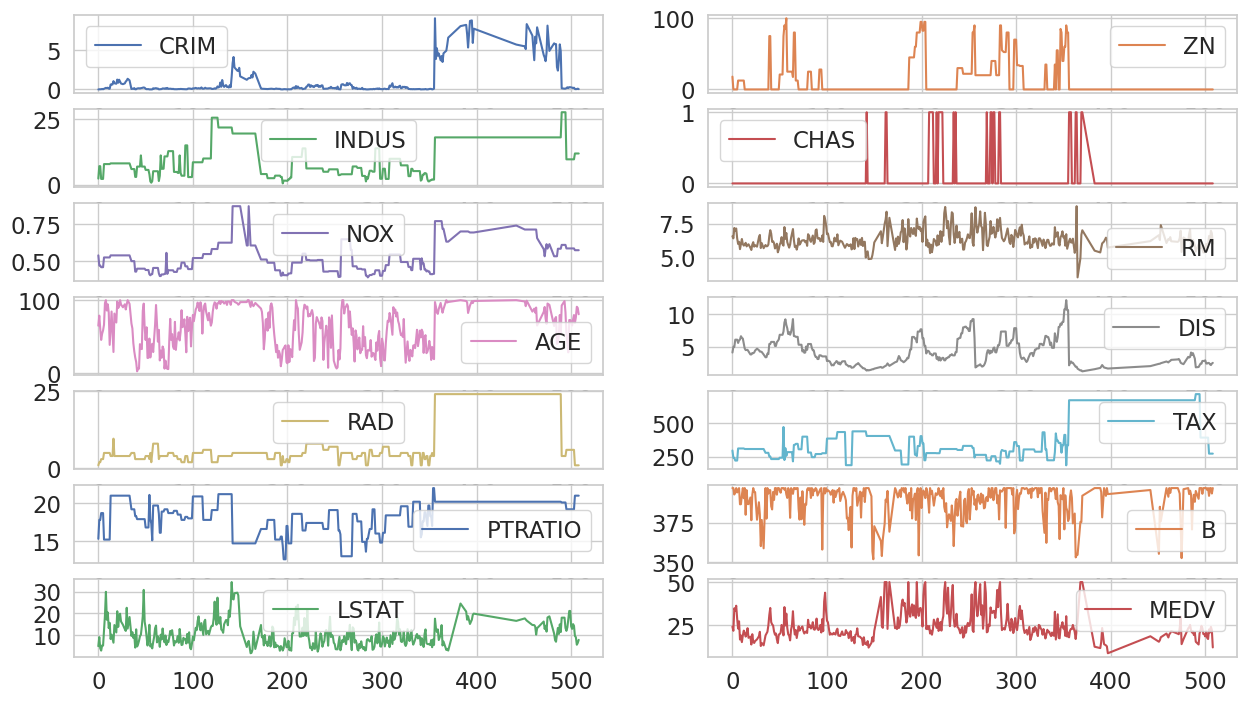

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

membuat matriks scatter plot untuk memvisualisasikan hubungan antar variabel dalam dataset. Setiap scatter plot pada matriks menggambarkan hubungan antara dua variabel dalam dataset. Ukuran gambar yang diatur dengan figsize memungkinkan mengatur ukuran matriks scatter plot sesuai kebutuhan.

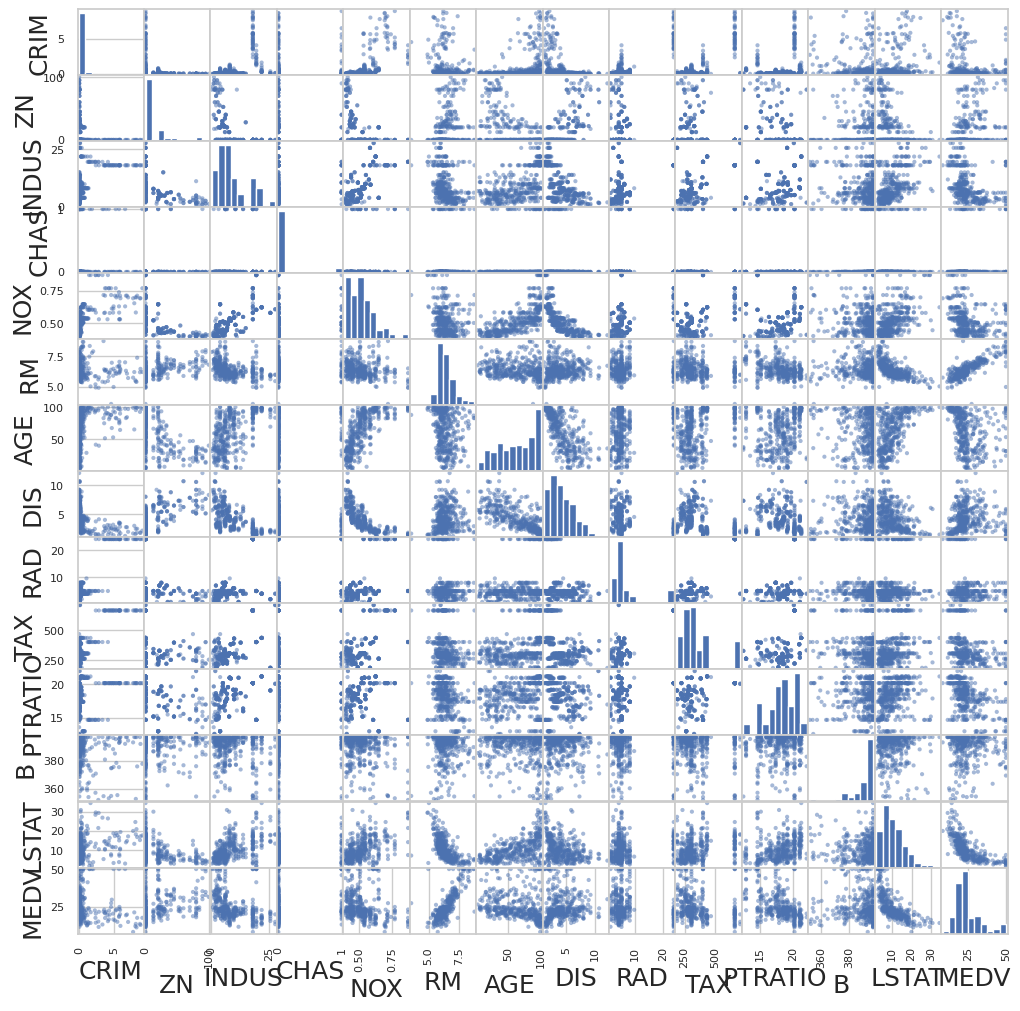

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

membuat peta (heatmap) untuk memvisualisasikan matriks korelasi antar variabel dalam dataset. Peta menggunakan skema warna untuk menggambarkan tingkat korelasi antara setiap pasangan variabel, dengan nilai korelasi yang lebih tinggi ditampilkan dengan warna yang lebih terang. Nilai korelasi juga ditampilkan pada setiap sel peta panas untuk memberikan informasi lebih lanjut tentang korelasi antar variabel. 

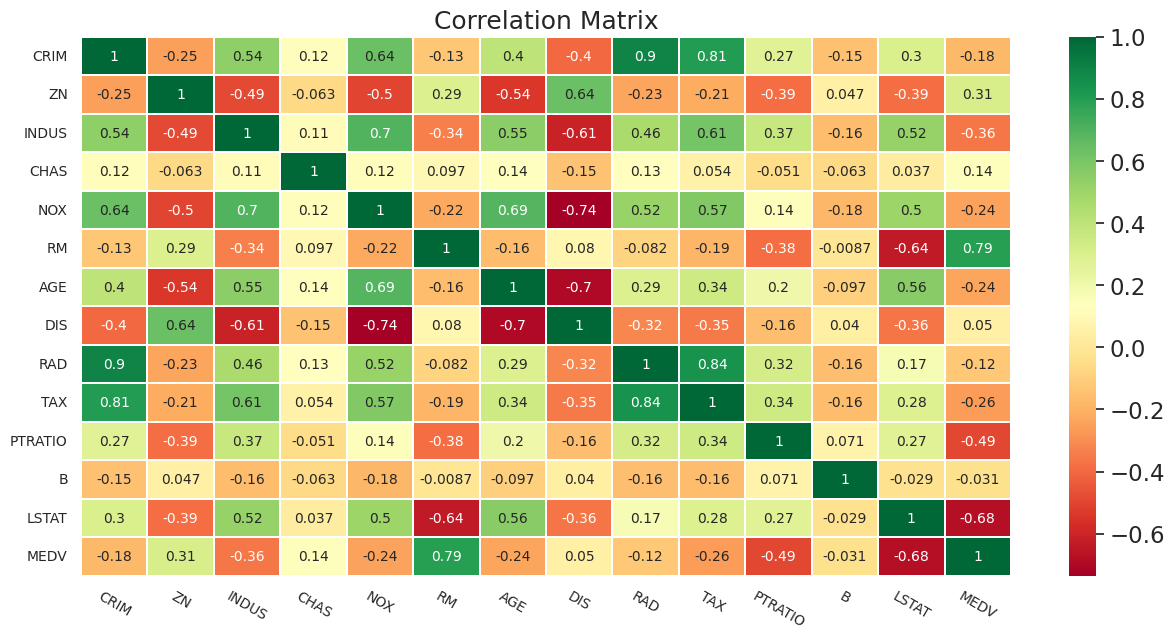

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

EXPLORATORY DATA ANALYSIS

In [ ]:
dataset3 = dataset

membuat sebuah objek Figure dengan dua subplot yang menampilkan histogram distribusi kolom 'CRIM' dan 'B' dalam dataset3. Subplot pertama (ra1) menunjukkan histogram untuk kolom 'CRIM', sementara subplot kedua (ra2) menunjukkan histogram untuk kolom 'B'. Ukuran gambar, judul subplot, dan tata letak subplot yang ditentukan dalam kode memungkinkan untuk menyesuaikan tampilan plot sesuai kebutuhan.






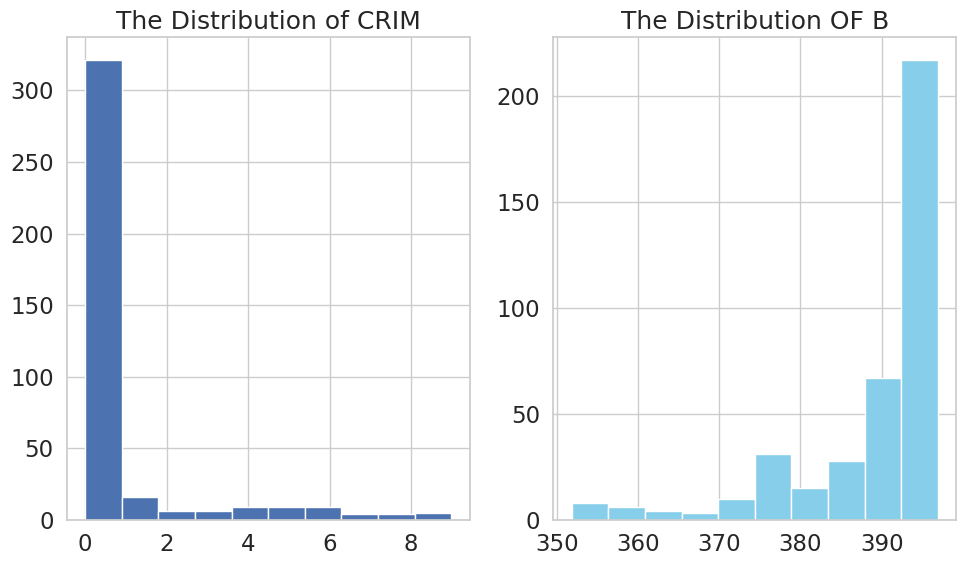

In [ ]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset3['CRIM'])
ra1.set_title('The Distribution of CRIM')

ra2.hist(dataset3['B'], color = 'skyblue')
ra2.set_title('The Distribution OF B')

plt.tight_layout() 
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

 kolom 'CHAS' dihapus dari dataset, dataset baru yang tidak termasuk kolom 'CHAS' disimpan dalam variabel x. Variabel x akan berisi data baru yang terdiri dari semua kolom yang sama dengan dataset, kecuali kolom 'CHAS'.

In [ ]:
x = dataset.drop('CHAS', axis=1)
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


Choose feature Type as a label

mengambil kolom 'CHAS' dari dataset dan menyimpannya dalam variabel y. Jadi, y akan berisi rangkaian nilai yang merupakan data dari kolom 'CHAS' dalam dataset.

In [ ]:
y = dataset["CHAS"]
y

0      0
1      0
2      0
3      0
4      0
      ..
504    0
505    0
506    0
507    0
508    0
Name: CHAS, Length: 389, dtype: int64

array y akan diubah menjadi bentuk baru dengan satu kolom dan jumlah baris yang disesuaikan secara otomatis sesuai dengan dimensi yang ada.

In [ ]:
y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

x akan berisi variabel dummy biner untuk setiap kolom kategorikal yang ada dalam dataset sebelumnya.

In [ ]:
x = pd.get_dummies(x)
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [ ]:
x.shape

(389, 13)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.483011,0.134805,-1.077668,0.173231,0.259783,0.112034,-0.108675,-0.887081,-0.408287,-1.327102,0.759582,-0.969217,-0.099414
1,-0.471454,-0.573833,-0.336315,-0.514179,0.033734,0.602880,0.312646,-0.729196,-0.816069,-0.163974,0.759582,-0.239206,-0.380834
2,-0.471466,-0.573833,-0.336315,-0.514179,1.155170,-0.034861,0.312646,-0.729196,-0.816069,-0.163974,0.349481,-1.135927,1.155254
3,-0.468669,-0.573833,-1.097916,-0.623766,0.880683,-0.583032,0.838685,-0.571311,-0.967100,0.254752,0.530852,-1.327204,1.002817
4,-0.448473,-0.573833,-1.097916,-0.623766,1.099392,-0.282075,0.838685,-0.571311,-0.967100,0.254752,0.759582,-0.907798,1.331141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,-0.452008,-0.573833,0.420614,0.521917,0.286204,0.251764,-0.882723,-0.887081,-0.581972,1.324830,0.264841,-0.146200,-0.287027
385,-0.461566,-0.573833,0.420614,0.521917,-0.408088,0.524058,-0.974519,-0.887081,-0.581972,1.324830,0.759582,-0.249735,-0.498093
386,-0.453038,-0.573833,0.420614,0.521917,0.848390,1.036401,-1.032162,-0.887081,-0.581972,1.324830,0.759582,-0.853398,-0.111139
387,-0.426153,-0.573833,0.420614,0.521917,0.581242,0.975493,-0.925811,-0.887081,-0.581972,1.324830,0.411953,-0.705992,-0.333931


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


variabel x akan berisi data yang telah mengalami penskalaan Min-Max.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.18,0.067815,0.309129,0.577505,0.641607,0.264333,0.000000,0.208015,0.287234,1.000000,0.099449,0.373494
1,0.002338,0.00,0.242302,0.165975,0.547998,0.782698,0.344623,0.043478,0.104962,0.553191,1.000000,0.226744,0.315663
2,0.002336,0.00,0.242302,0.165975,0.694386,0.599382,0.344623,0.043478,0.104962,0.553191,0.909656,0.070379,0.631325
3,0.002902,0.00,0.063050,0.143154,0.658555,0.441813,0.444870,0.086957,0.066794,0.648936,0.949612,0.037026,0.600000
4,0.006988,0.00,0.063050,0.143154,0.687105,0.528321,0.444870,0.086957,0.066794,0.648936,1.000000,0.110159,0.667470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.006273,0.00,0.420455,0.381743,0.580954,0.681771,0.116824,0.000000,0.164122,0.893617,0.891010,0.242962,0.334940
385,0.004339,0.00,0.420455,0.381743,0.490324,0.760041,0.099331,0.000000,0.164122,0.893617,1.000000,0.224908,0.291566
386,0.006065,0.00,0.420455,0.381743,0.654340,0.907312,0.088346,0.000000,0.164122,0.893617,1.000000,0.119645,0.371084
387,0.011504,0.00,0.420455,0.381743,0.619467,0.889804,0.108613,0.000000,0.164122,0.893617,0.923418,0.145349,0.325301


**4.3 Splitting**

 berisi subset train dan test yang telah dibagi secara acak dari dataset asli, dengan proporsi yang telah ditentukan.

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

mencetak distribusi kelas dalam subset train dan test

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 287, 1: 24})
Test distribution Counter({0: 72, 1: 6})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

list models akan berisi satu elemen tuple yang merepresentasikan model Logistic Regression dengan label 'LR'.






In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

mencetak hasil evaluasi performa model.

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.922782 (0.046134)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9230769230769231


menghitung dan memvisualisasikan matriks konfusi dari hasil prediksi model terhadap data test. Matriks konfusi adalah tabel yang menggambarkan jumlah prediksi yang benar dan salah untuk setiap kelas dalam masalah klasifikasi.

[[72  0]
 [ 6  0]]


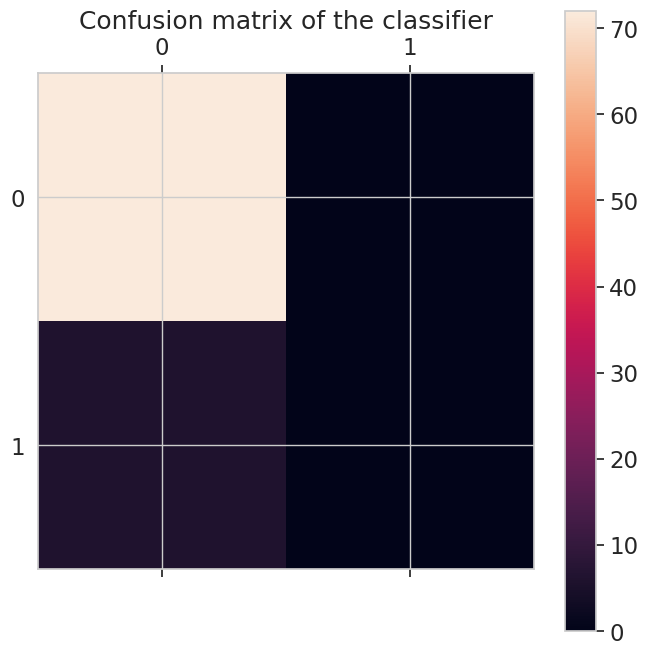

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

laporan klasifikasi akan mencakup beberapa metrik evaluasi klasifikasi, termasuk akurasi (accuracy), presisi (precision), recall (recall), dan f1-score (F1 score) untuk setiap kelas dalam masalah klasifikasi. Laporan ini berguna untuk mengevaluasi performa model dalam memprediksi kelas-kelas yang berbeda.






In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       0.00      0.00      0.00         6

    accuracy                           0.92        78
   macro avg       0.46      0.50      0.48        78
weighted avg       0.85      0.92      0.89        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
